## RNA-Seq Workflow Template

Make sure to have numpy 1.xx installed. It does not currently support numpy 2.

1. Import modules from rnaseq package

In [ ]:
import pandas as pd
from pyensembl import EnsemblRelease
from rnaseq import clustering
from rnaseq import SOM
from rnaseq import mapping
from rnaseq import gogsea

Run '!pyensembl install --release 111 --species human' in terminal to install Ensembl.

Release 111 is the latest release, as of the writing of this template. Update if needed.

Begin commands with '!' to run terminal commands in Jupyter Notebook.

In [ ]:
#Dataset Simão

file='Datasets/TeissandierMulti_genes_gencode_all_rmsk_perFamily_56.csv' #selects data file
dataset= pd.read_csv(file, delimiter=",", header=0, index_col=0) #make it into a dataframe 
ensembl_id=True #choose whether it uses ensembl_ids or gene symbols
Ensembl=EnsemblRelease(release=111, species='human') #load ensembl to match ensembl ids and gene symbols
nreplicates=1 #specify the number of replicate conditions
##Symbols to Gene IDs
dados=SOM.tratamento(dataset)

def treat_simao(x):
    total=0
    subs=0
    te=0
    for idx in range(x.shape[0]):
        if not x[idx, 0].startswith('ENSG'):
            total+=1
            if x[idx,0].startswith('TE_'):
                te+=1
            try:
                gene_id = Ensembl.gene_ids_of_gene_name(x[idx,0])
                x[idx, 0] = gene_id[0]
                subs+=1
            except ValueError:
                print(f'{x[idx,0]} not recognized')
        
    print(f'total symbols:{total-te}')
    print(f'subs:{subs}')
    print(f'tranposable elements:{te}')
    return x

fim=treat_simao(dados)

header_list = dataset.columns.tolist()
header_list = [col[51:-29] for col in header_list]
simao_dataset=pd.DataFrame(fim[0:], index=dados[:,0])
simao_dataset=simao_dataset.drop(simao_dataset.columns[0], axis=1)
simao_dataset.columns= header_list
simao_dataset = simao_dataset.apply(pd.to_numeric, errors='coerce')

In [13]:
simao_dataset

,AD_3501,AD_5601,AG_3501,AG_3502,AG_5601,AG_5602,AG_D35,G_3501,G_5601,GIBCO_D35,T_3501,T_3502,T_5601,T_5602,TCLAB_D35
ENSG00000227232,0.063138,-0.272111,0.201104,0.182659,-0.218352,0.006403,-0.108623,0.432617,0.460064,0.180848,0.020815,-0.253621,-0.238345,0.051694,-0.508289
ENSG00000278267,-0.455522,-0.141978,0.683265,-0.032304,-0.927740,-0.343047,-0.191329,0.430973,0.667538,0.831859,-0.141328,0.269434,-0.055730,-0.243012,-0.351079
ENSG00000268903,-0.661198,-0.041256,-0.070064,-0.295160,-0.000902,0.350046,-0.764521,-0.029123,0.783600,-0.828535,0.180782,1.051140,0.693642,0.433149,-0.801601
ENSG00000269981,-1.371916,0.090038,-0.309051,-0.750266,0.017385,0.239452,0.180021,-0.171019,1.302784,0.062825,-0.318654,0.800705,0.488691,0.168806,-0.429800
ENSG00000239906,-0.252865,-0.662615,0.105013,-2.153837,-0.675574,-0.251837,0.463844,-0.078877,0.490538,0.176203,-0.421798,1.251753,0.701515,0.224974,1.083564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TE_MER9B,-0.015865,0.029780,-0.087929,-0.266571,0.852125,-0.042806,-0.092283,-0.093727,0.300354,1.518102,0.030456,-0.558107,0.346588,-0.659459,-1.260657
TE_LSAU,-1.895446,-1.765916,0.407686,0.861495,0.067166,0.649507,-0.993084,1.164959,0.925292,1.622424,0.491288,-0.377919,0.097588,-0.589853,-0.665187
TE_GSATX,1.153791,-0.145178,-0.832001,-1.421732,-1.680106,-0.939231,-0.170957,0.131829,1.367191,1.098496,0.939964,0.557873,0.357775,0.239953,-0.657669
TE_HERV1_LTRe,0.917968,-0.264454,0.438566,0.222007,0.526921,0.900914,0.365616,-1.469763,0.818001,-1.189669,0.057287,-0.290683,0.355609,-0.069810,-1.318509


### SOM Module

In [3]:
dados=SOM.tratamento(dataset) #turns the dataframe into an array

In [255]:
#SOM and mapping results, uses both dataset and dados dataframes for reasons above.
main_map, classification = SOM.SOM(simao_dataset, dados, map_size=40, period=dataset.values.shape[0]*151, learning_rate=0.05)

TRAINING...


  0%|          | 0/3087950 [00:00<?, ?it/s]

FINISHED.


  0%|          | 0/20450 [00:00<?, ?it/s]

Quantization Error: 1.1702674909535453
Topographic Error: 0.0938875305623472


Load

In [3]:
#load your SOM and its classification objects
main_map, classification = SOM.SOMSaver(mode='load', main_map_name='mapsimao3_142.pkl', classification_name='classsimao35_142.pkl')

Save

In [242]:
#save your SOM and its classification objects
SOM.SOMSaver(mode='save', main_map_name='mapsimao35_.pkl', classification_name='classsima142.pkl', main_map_object=main_map, classification_object=classification)

In [4]:
#compute an average of each condition based on the number of replicates previously specified.
main_map_avg=SOM.avgmaps(main_map,nreplicates)

In [ ]:
metagene_map=SOM.metagenes(main_map) #array identical t the SOM map with the returned metagene vectors
genesymbol_grid = SOM.genename_dict(classification, ensembl_id) #dictionary with each node as a key and its mapped gene symbols
geneid_grid = SOM.geneid_dict(classification, ensembl_id) #dictionary with each node as a key and its mapped gene ensembl ids

### Mapping Module

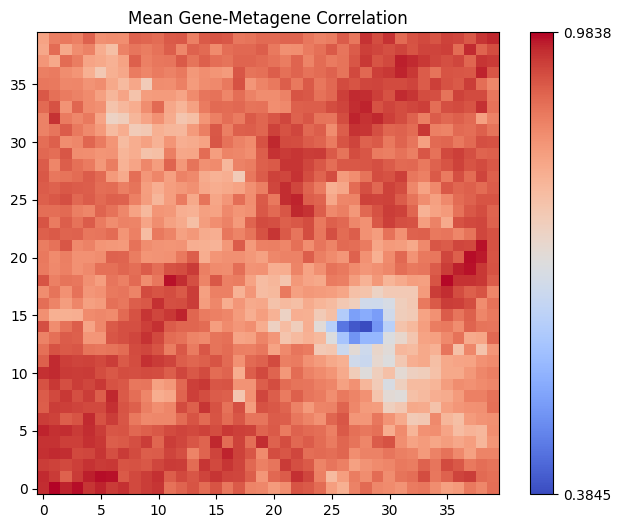

In [6]:
#plot of the average of the correlations between gene expression and metagene in each node.
mapping.correlation(main_map, classification, metagene_map)

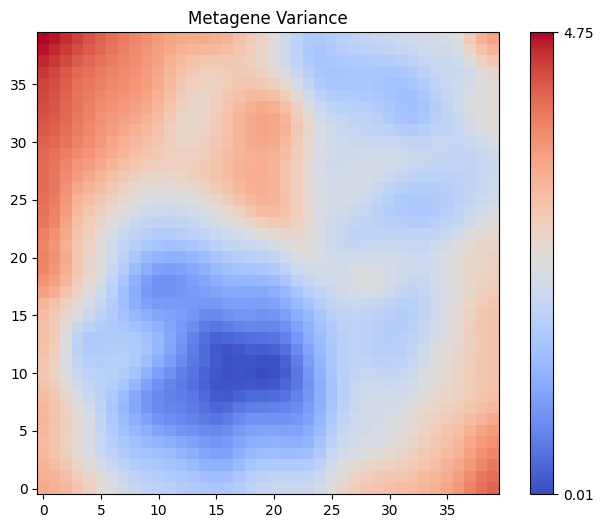

In [8]:
#Variance plot of metagenes
mapping.variance(main_map, metagene_map)

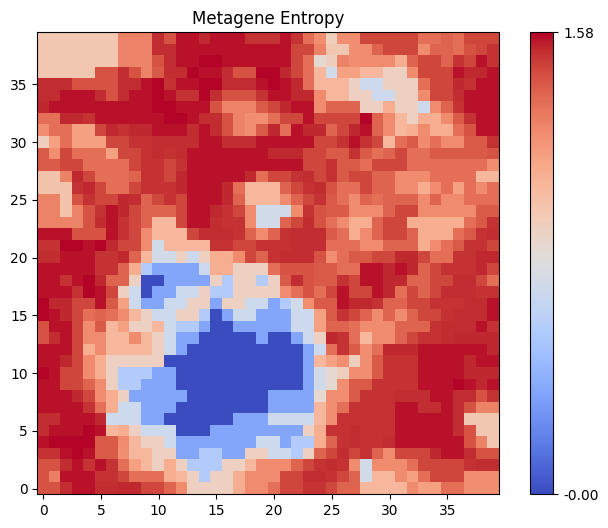

In [9]:
#plot of meatgene entropy, between states of overexpression, underexpression and inconclusive.
mapping.entropy(main_map, metagene_map)

This function will produce an Index Error if the user specifies less maps (n_rows*n_columns) than there are available.

Gene ID:'ENSG00000114062', name:'UBE3A' found in index at position (14, 37): ENSG00000114062
Coordinates in SOM are'(37, 14)'
Gene ID:'ENSG00000224078', name:'SNHG14' found in index at position (32, 36): ENSG00000224078
Coordinates in SOM are'(36, 32)'
Gene ID:'ENSG00000152208', name:'GRID2' found in index at position (20, 28): ENSG00000152208
Coordinates in SOM are'(28, 20)'
Gene ID:'ENSG00000078018', name:'MAP2' found in index at position (39, 31): ENSG00000078018
Coordinates in SOM are'(31, 39)'
Gene ID:'ENSG00000075891', name:'PAX2' found in index at position (14, 39): ENSG00000075891
Coordinates in SOM are'(39, 14)'
Gene ID:'ENSG00000089116', name:'LHX5' found in index at position (0, 39): ENSG00000089116
Coordinates in SOM are'(39, 0)'
Gene 'ENSG00000168267' not found.
Gene ID:'ENSG00000126259', name:'KIRREL2' found in index at position (8, 38): ENSG00000126259
Coordinates in SOM are'(38, 8)'
Gene 'ENSG00000131095' not found.
Gene 'ENSG00000205927' not found.
Gene ID:'ENSG0000021

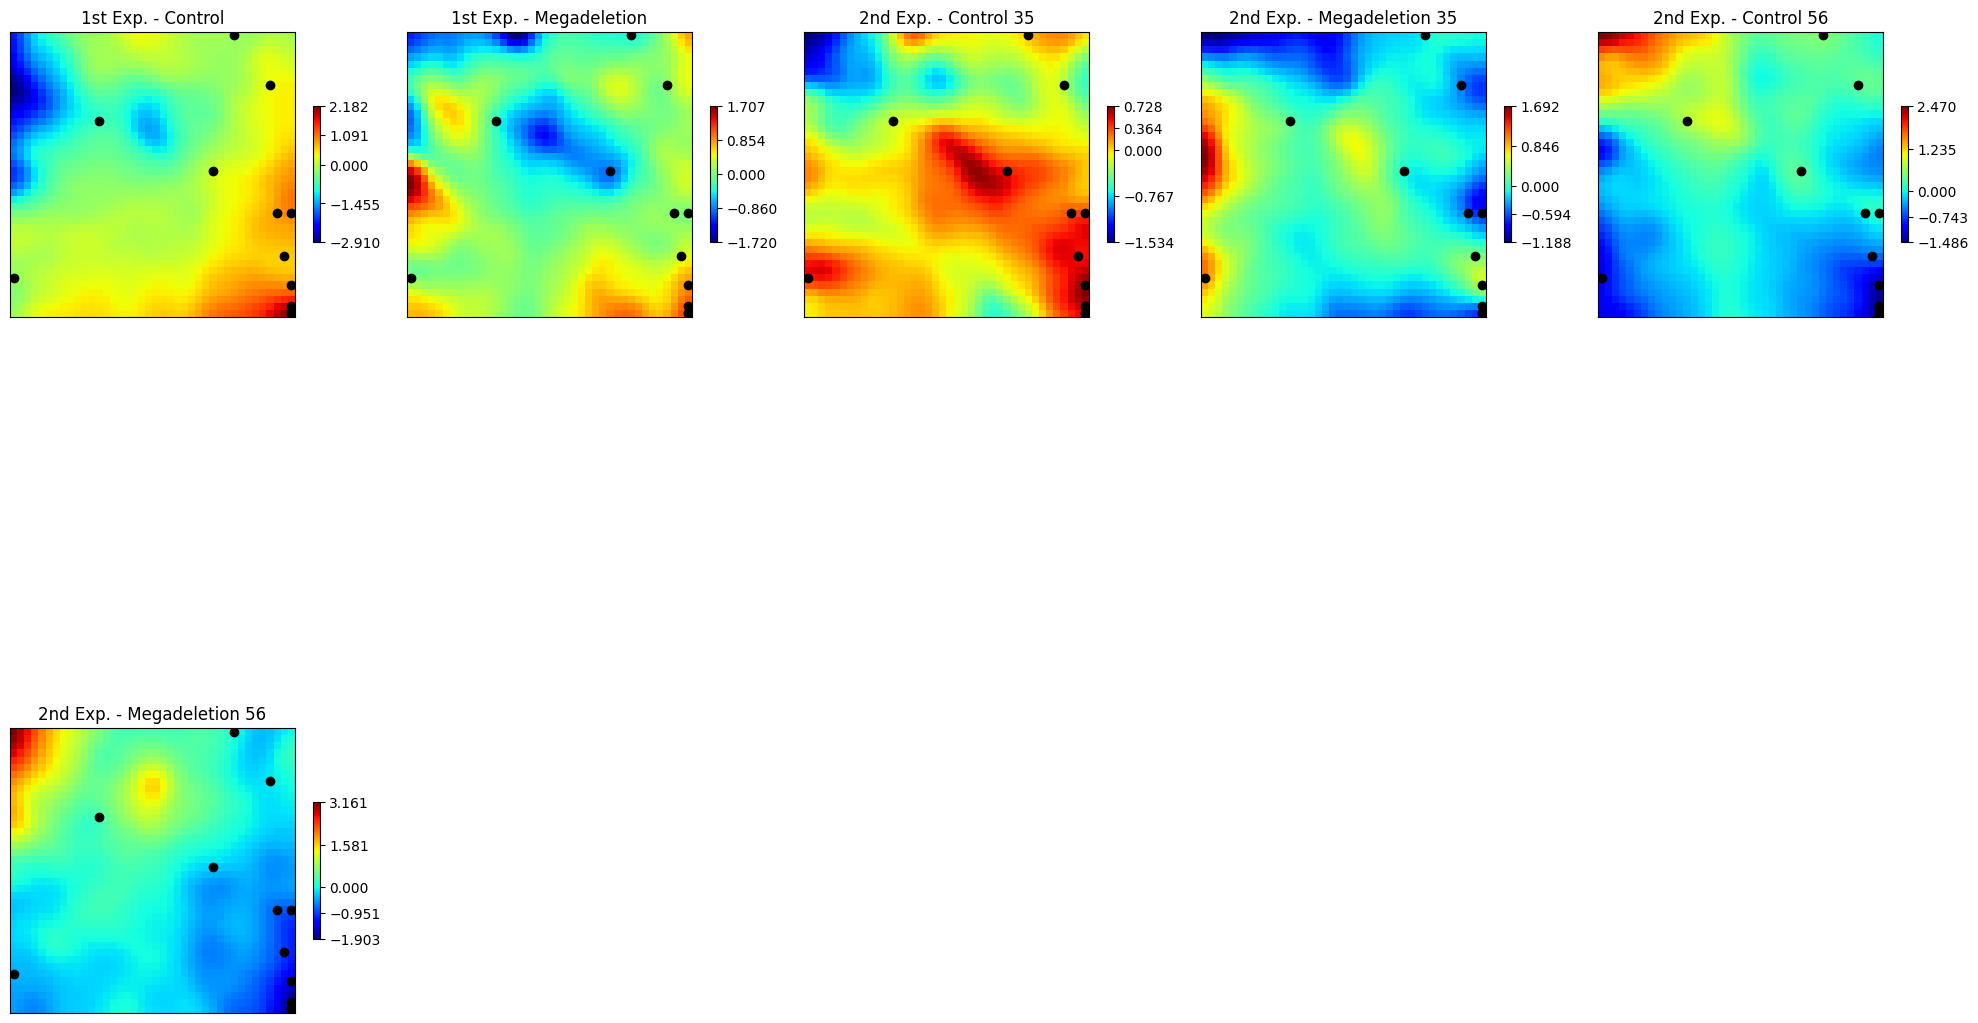

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def avgmapsimao2(main_map):
    main_map_avg=[]
    # 1st experiment
    # Controlo 35
    main_map_avg.append((main_map.weights[:,:,14]+main_map.weights[:,:,9])/2)
    # Megadeletion 35
    main_map_avg.append((main_map.weights[:,:,6]))
    # 2nd experiment
    # Controlo 35
    main_map_avg.append((main_map.weights[:,:,7]+main_map.weights[:,:,10]+main_map.weights[:,:,11])/3)
    # Megadeletion 35
    main_map_avg.append((main_map.weights[:,:,0]+main_map.weights[:,:,2]+main_map.weights[:,:,3])/3)
    # Controlo 56
    main_map_avg.append((main_map.weights[:,:,8]+main_map.weights[:,:,12]+main_map.weights[:,:,13])/3)
    # Megadeletion 56
    main_map_avg.append((main_map.weights[:,:,1]+main_map.weights[:,:,4]+main_map.weights[:,:,5])/3)
    return main_map_avg

def averaged_maps(main_map_avg, dataset, nreplicates, genelist, classification, ensemblid, n_rows, n_col):
    """
    Plots the averaged SOMs.
    Function gene_search is used to find coordinates of certain genes to plot on top of the SOM.
    Set n_col (int) to the number of columns of your figure and n_rows (int) to the number of rows.
    Title (int) should stay at 0. Used to iterate through the sample names to give each figure its respective name.
    """
    
    stage=SOM.gene_search(genenames=genelist, classification_map=classification.classification_map, ensembl_id=ensemblid)

    n_col=n_col
    n_rows=n_rows
    title=0
    fig = plt.figure(figsize=(20, 7*n_rows))
    gs = fig.add_gridspec(n_rows, n_col)
    xscatter=[]
    yscatter=[]
    titulos=['1st Exp. - Control', '1st Exp. - Megadeletion', '2nd Exp. - Control 35', '2nd Exp. - Megadeletion 35', '2nd Exp. - Control 56', '2nd Exp. - Megadeletion 56']
    

    for i in range(len(stage)): 
        xscatter.append(stage[i][0])
        yscatter.append(stage[i][1]) 

    for i, map_index in enumerate(range(len(main_map_avg))):

        row = i // n_col
        col = i % n_col
        ax = fig.add_subplot(gs[row, col])
        im = ax.imshow(main_map_avg[map_index], cmap='jet', interpolation='none', origin='lower')
        ax.scatter(yscatter, xscatter, c='#000000', marker='o')
        ax.set_title(titulos[i])
        ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
        fig.colorbar(im, ax=ax, shrink=0.2, ticks=[np.min(main_map_avg[map_index]),np.min(main_map_avg[map_index])/2, 0, np.max(main_map_avg[map_index])/2, np.max(main_map_avg[map_index])])
        title+=nreplicates
    fig.tight_layout()
    plt.show()

    return stage

avg_simao=avgmapsimao2(main_map)
genes=['UBE3A', 'SNHG14', 'GRID2', 'MAP2', 'PAX2', 'LHX5', 'PTF1A', 'KIRREL2', 'GFAP', 'OLIG2', 'SKOR2', 'BARHL1', 'ATOH1', 'NRGN', 'PAX6', 'SOX1']
genes2=['WNT7A', 'DLL1', 'GLI2', 'LHX1', 'LHX5', 'EGF', 'PAX2', 'GBX2', 'NEUROG2', 'SOX1', 'GSX2', 'BOC', 'PTCH1', 'PTCH2', 'CCND1']
stage=averaged_maps(avg_simao, simao_dataset, 1, genes , classification, True, 4, 5) #plot SOM portraits with the above genes marked

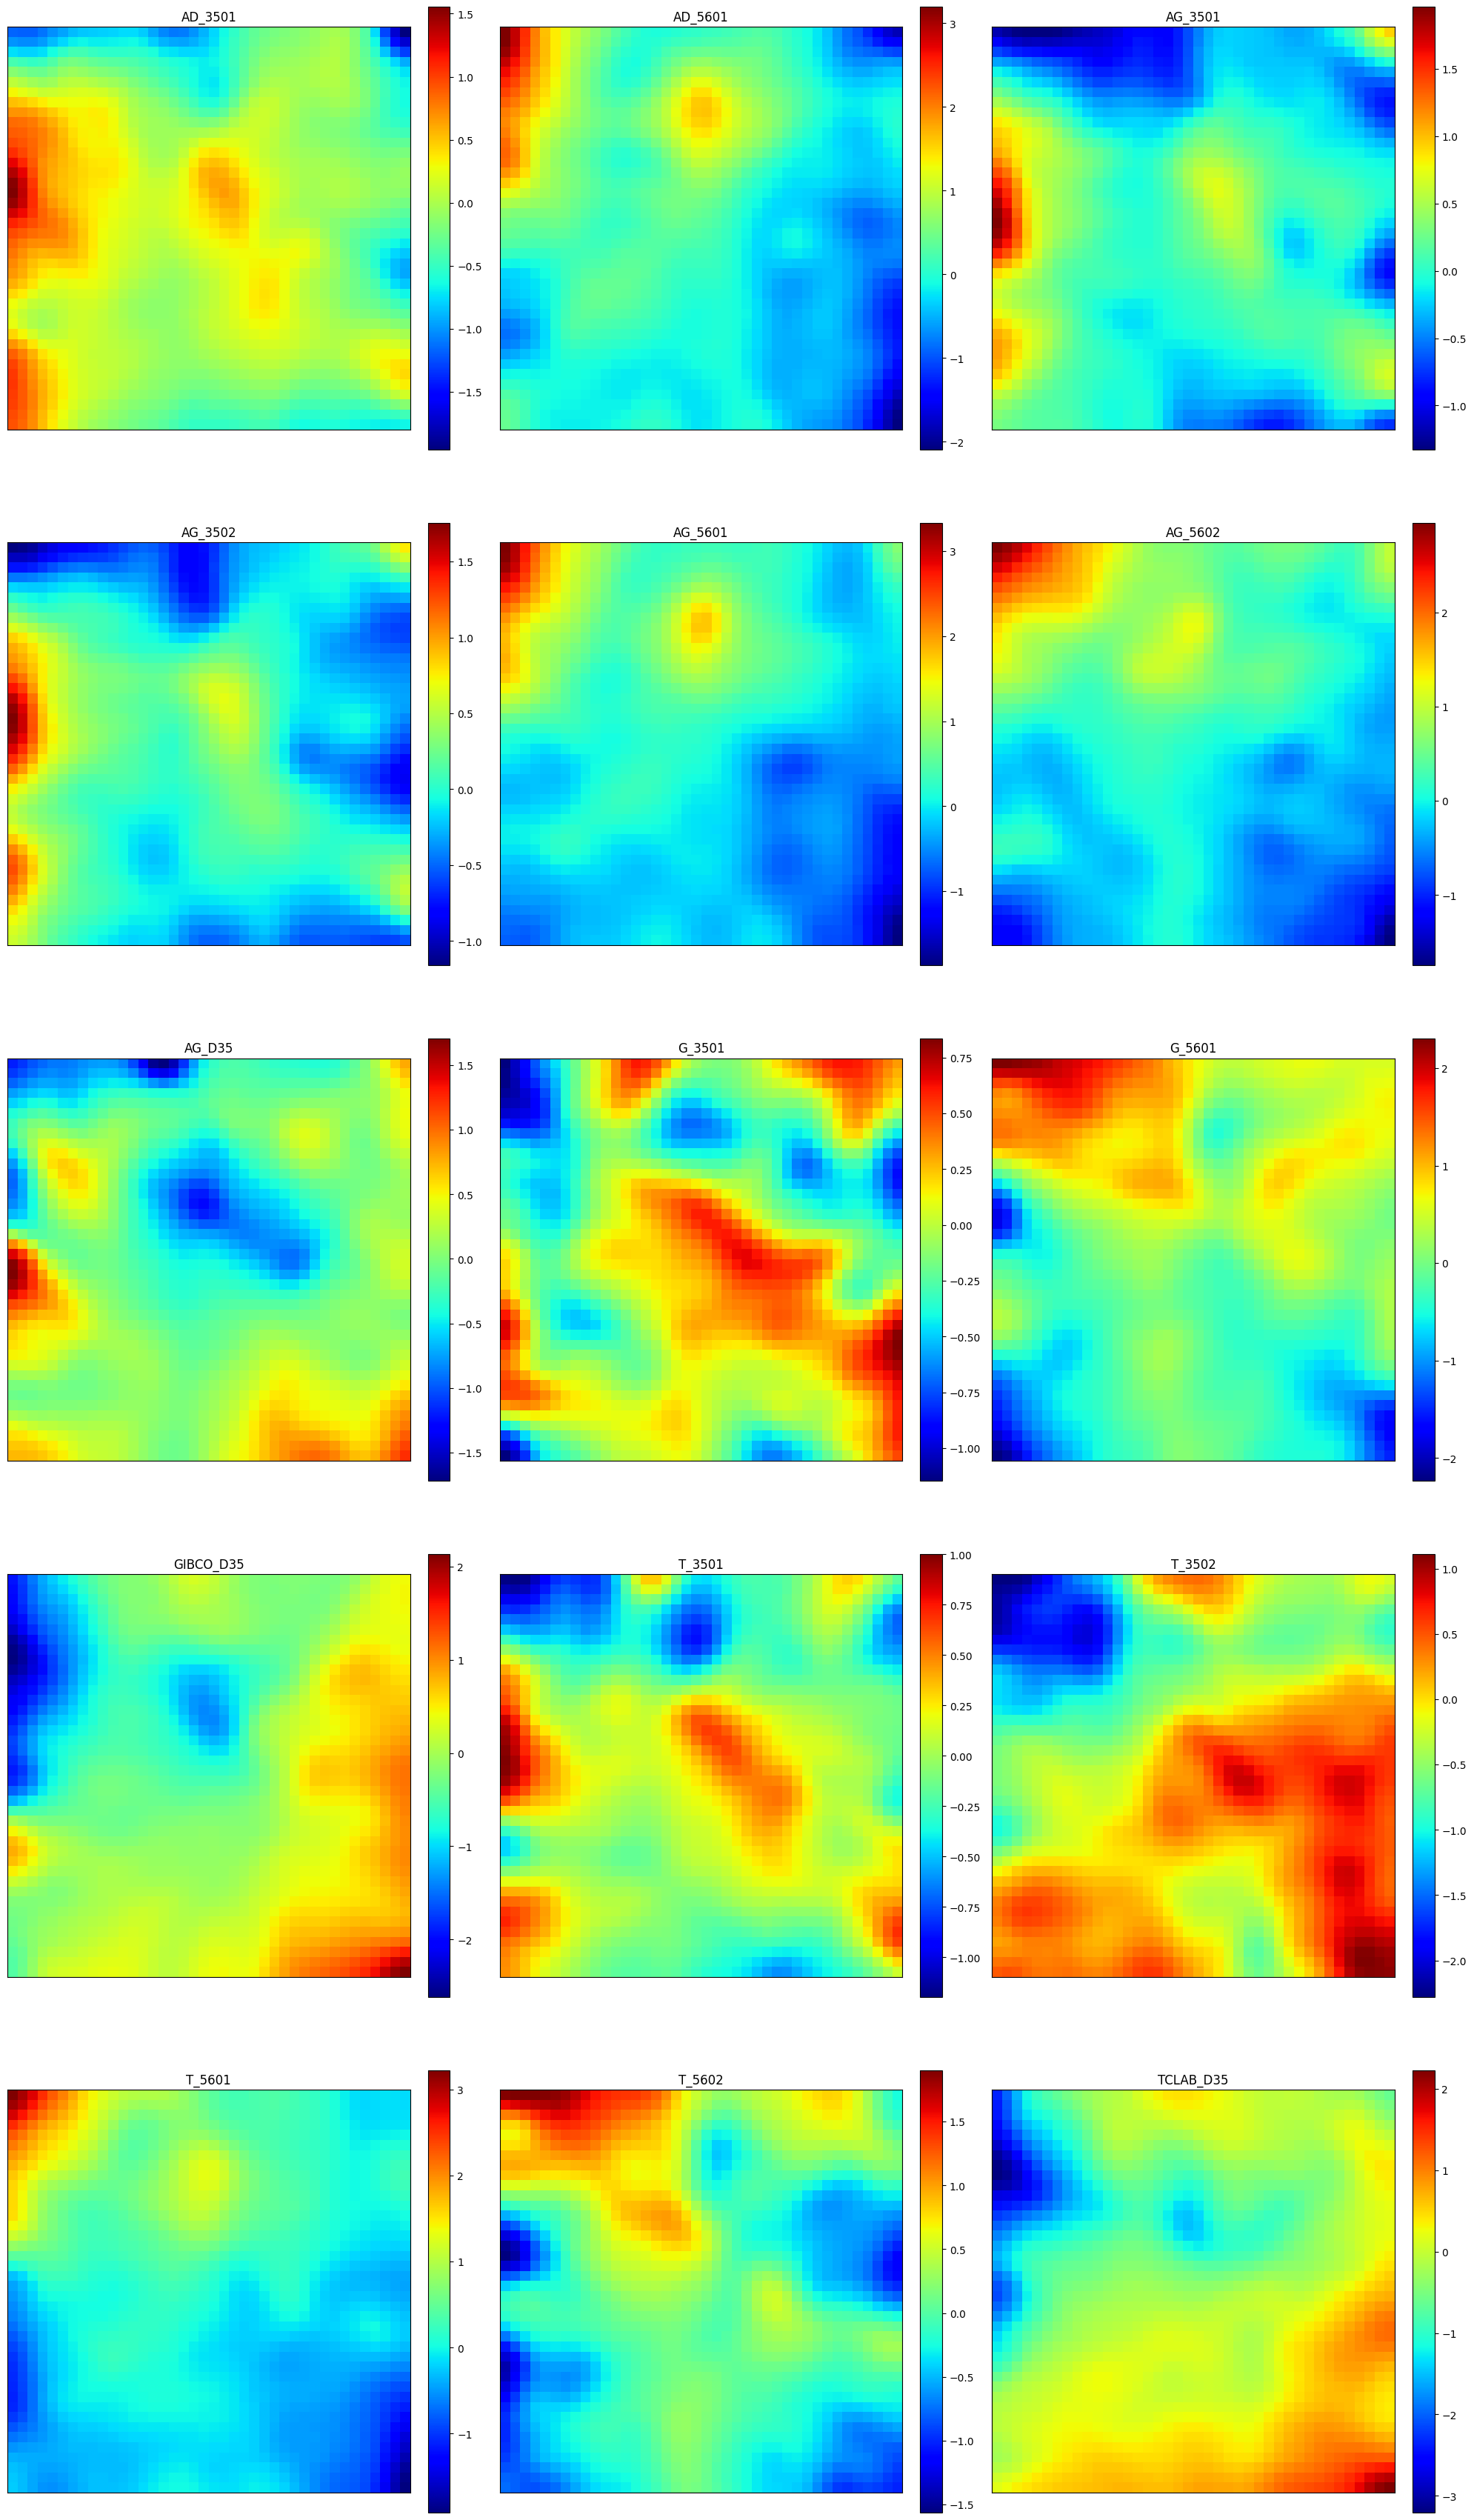

In [19]:
mapping.allmaps(main_map, dataset, 3, 'Simão2') #maps every SOM portrait and saves it in a folder.

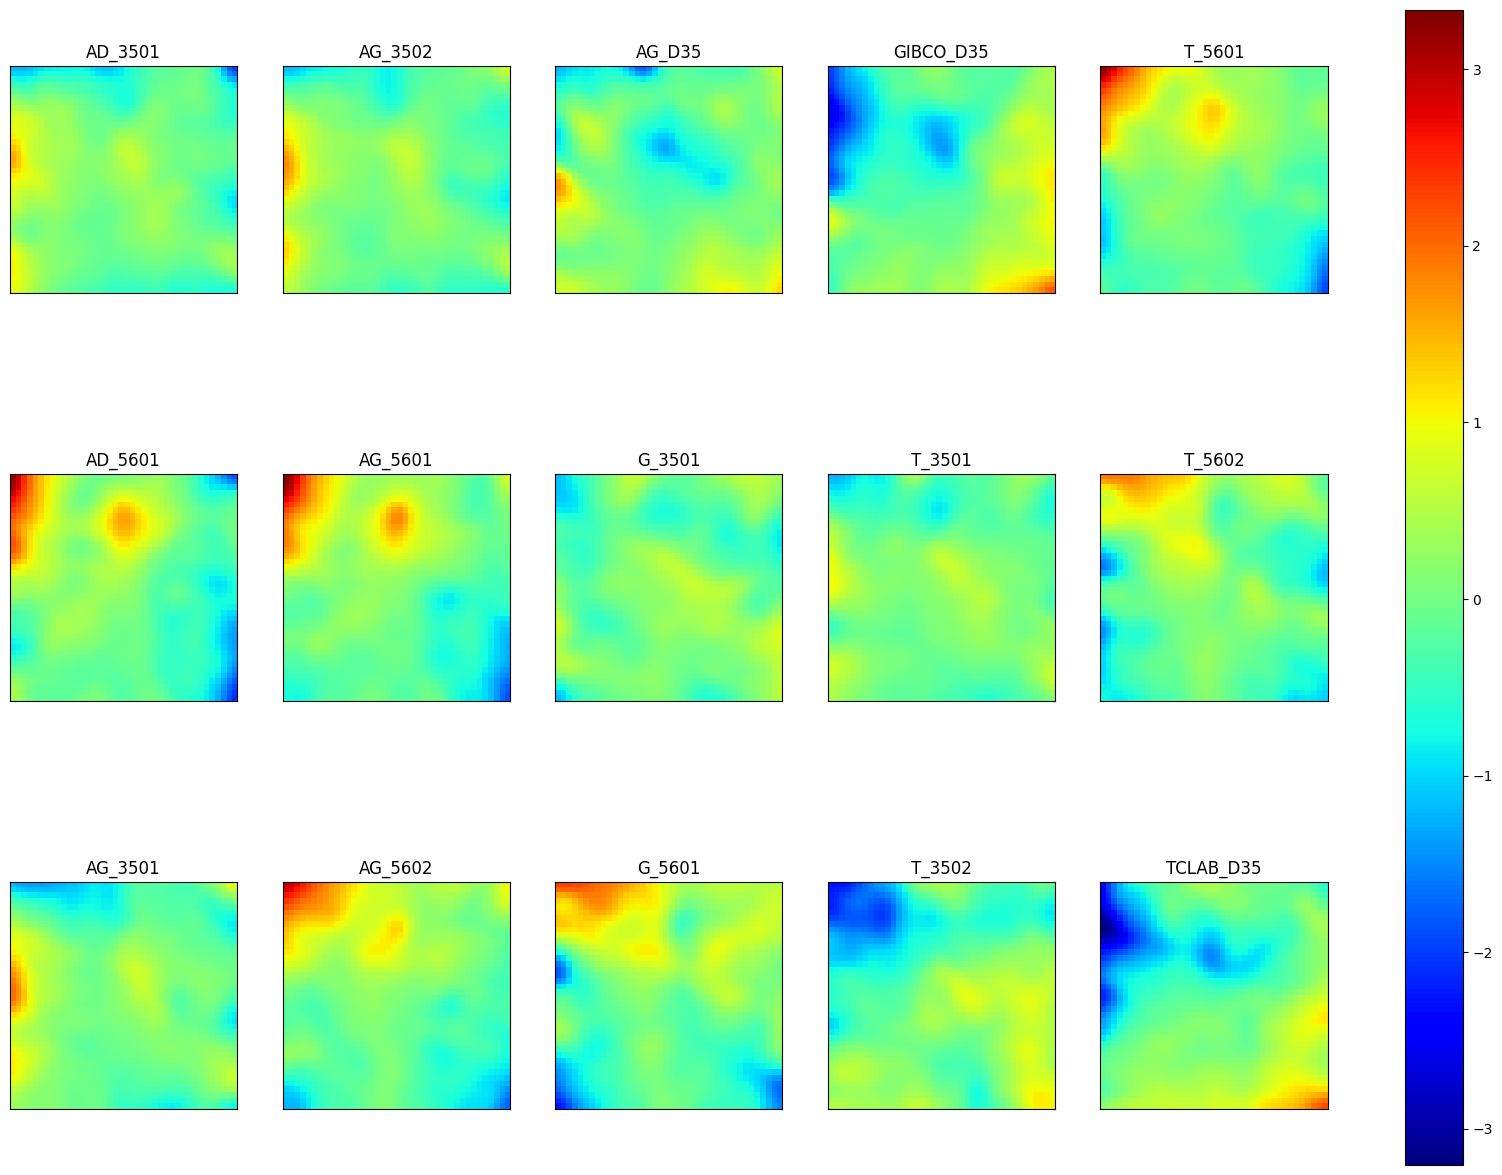

In [24]:
mapping.scaled_maps(main_map, simao_dataset, 3,5) #plots every SOM portrait with the same color scale

### Clustering Module

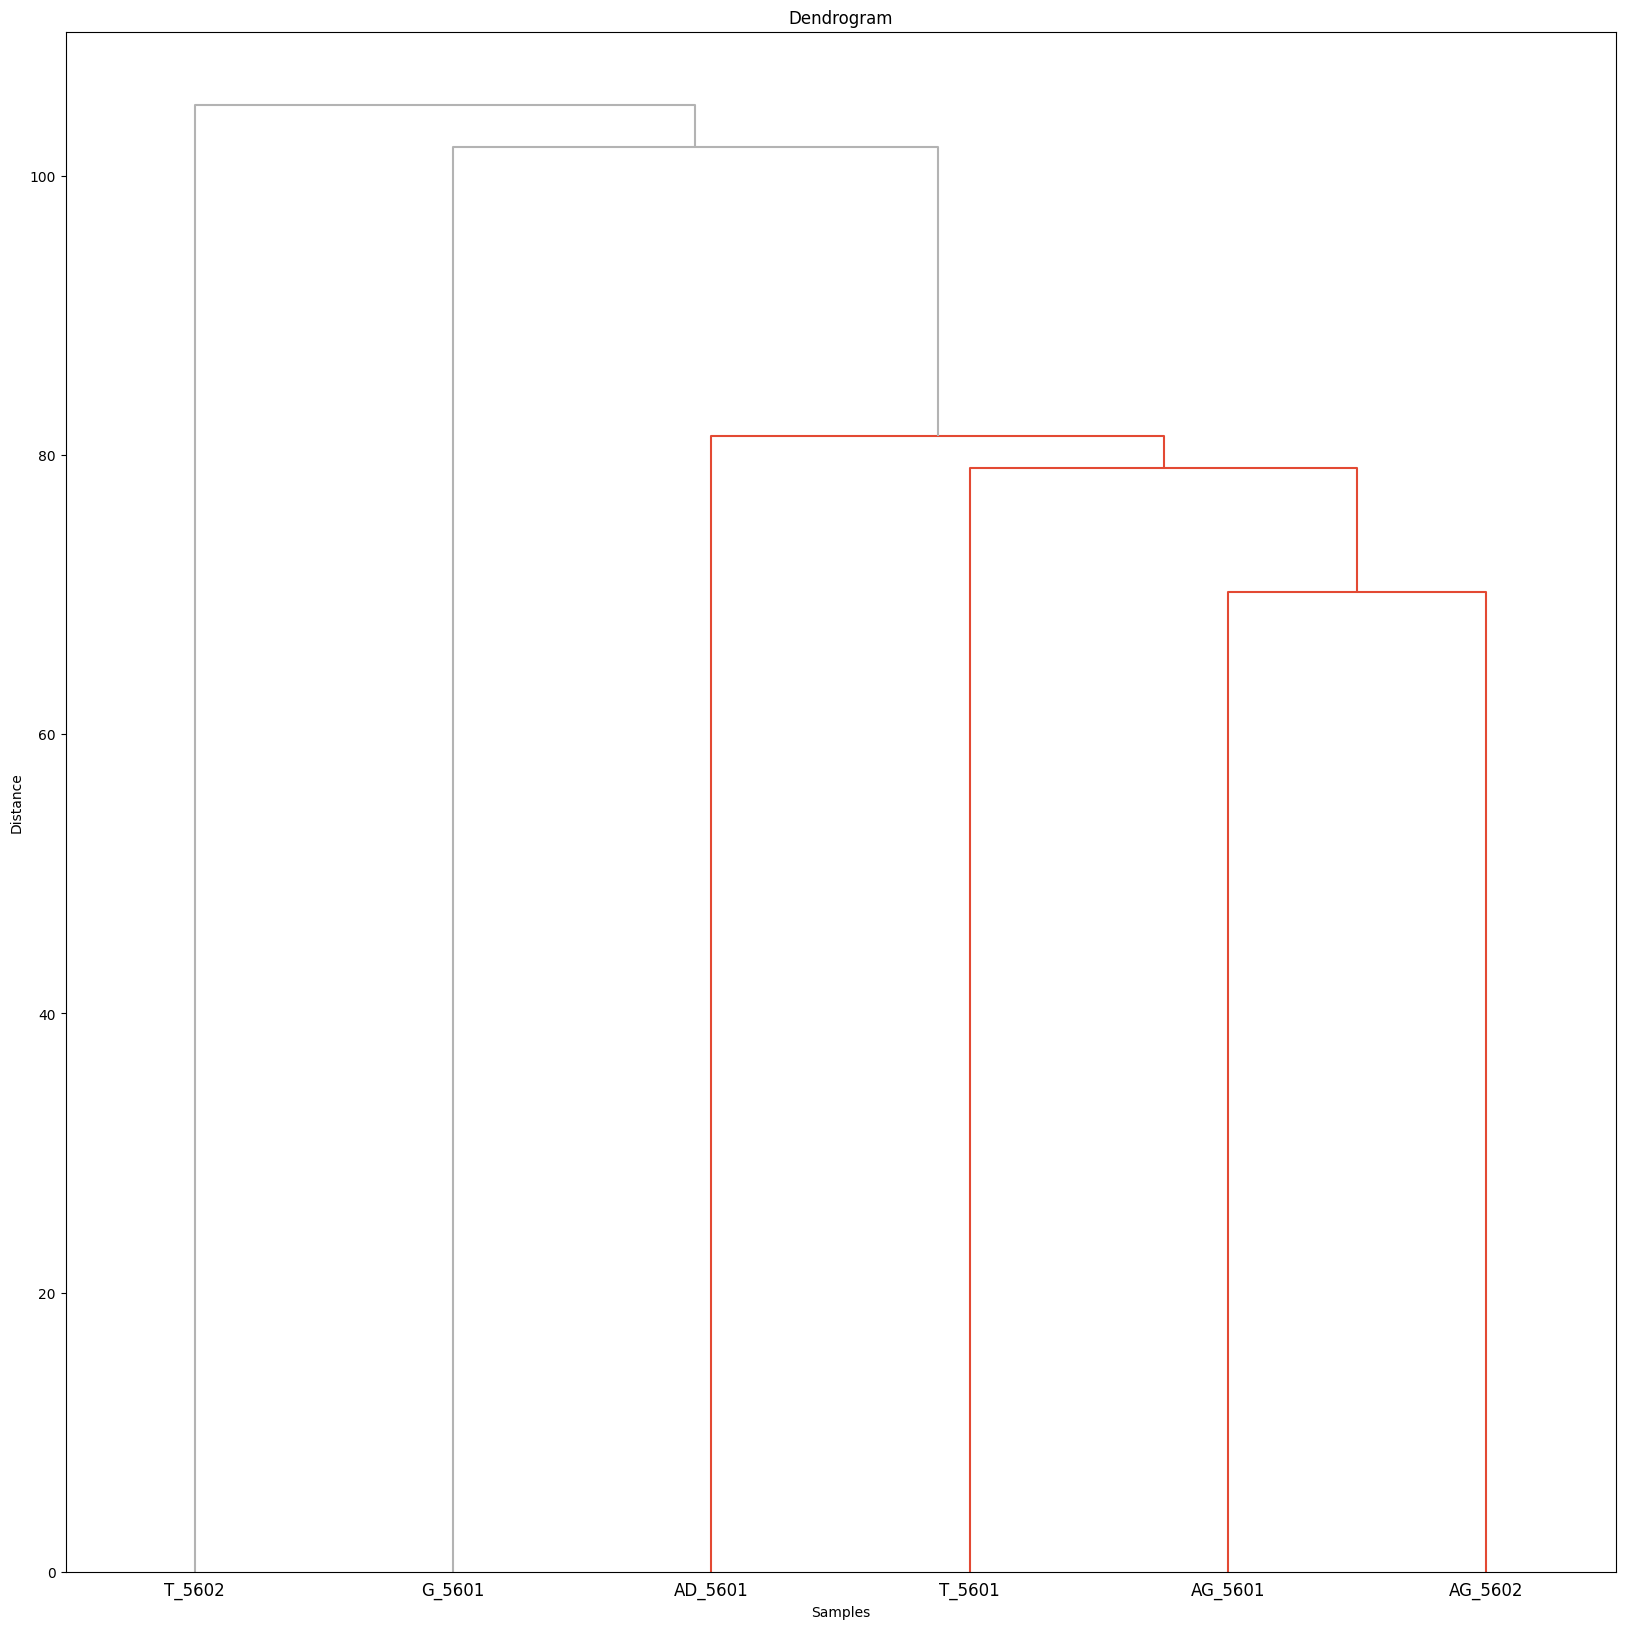

In [18]:
import seaborn as sb
CS1=clustering.what_to_cluster(simao_dataset, 'sample')
HC_CS1= clustering.hierarchical_matrix(CS1,'single', 'euclidean') #linkage_matrix
HC_partition_CS1 = clustering.hierarchical_partition(HC_CS1, 'life_time',0)
sbcmap = sb.color_palette("RdYlBu")
dendogram_CS1 = clustering.plot_dendrogram(HC_CS1, CS1.index, HC_partition_CS1['threshold'], sbcmap)
scores_CS1 = clustering.evaluate_clustering(CS1, HC_partition_CS1['samples_labels'] )

In [12]:
scores_CS1

{'calinski_harabasz': 8.059372763747625,
 'davies_bouldin': 1.1967276557222721,
 'silhouette': 0.2911773236533515}

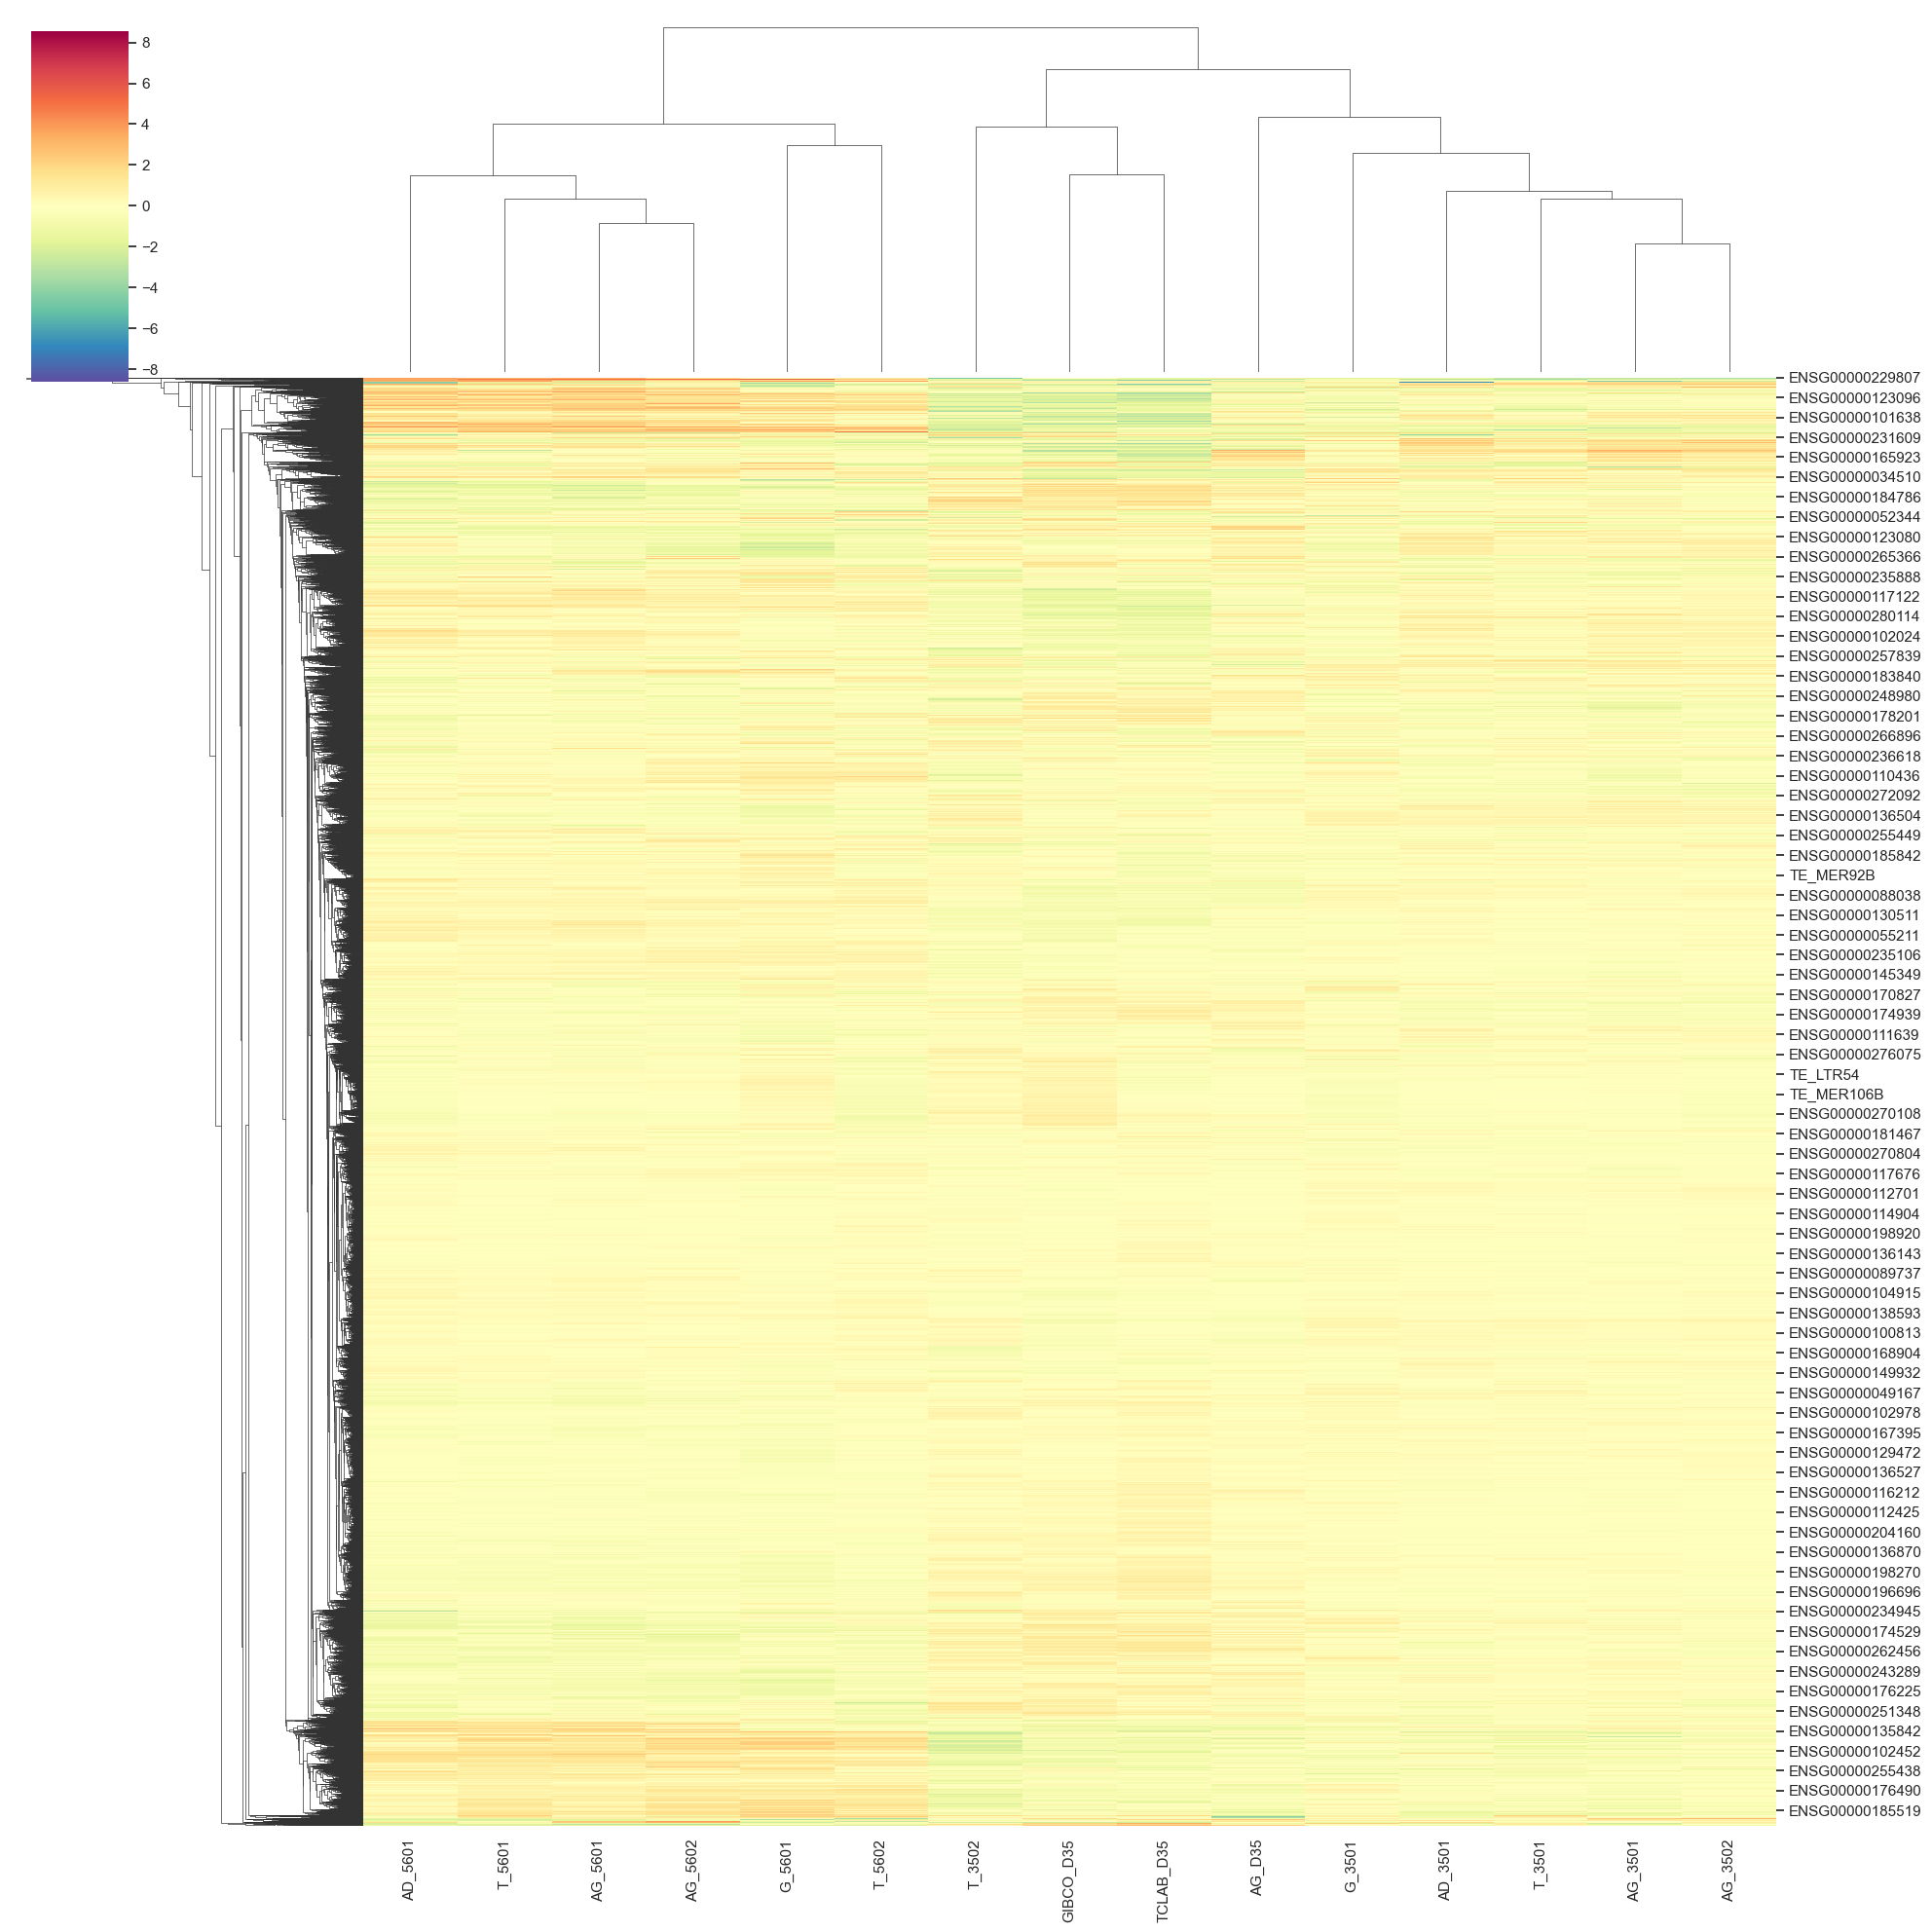

In [13]:
clustering.bicluster(simao_dataset, 'average', 'euclidean')

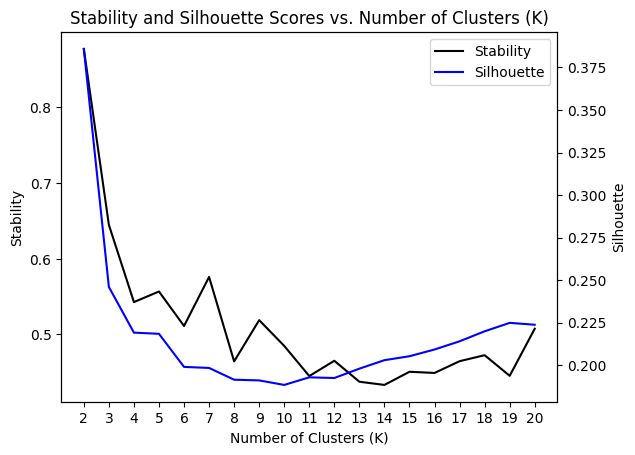

In [37]:
clustering.k_plot(metagene_map, 21) #plots a preliminary evaluation of average cluster stability and average silhouette score for each number of clusters

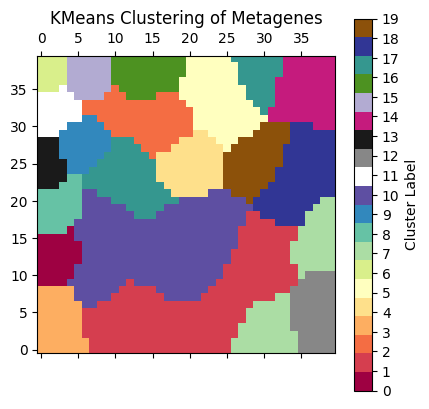

Average Silhouette Score within Cluster: {0: 0.25943079216152115, 1: 0.2178208748393743, 2: 0.11507616780450439, 3: 0.28774092970518295, 4: 0.233733461920893, 5: 0.16392889268509606, 6: 0.3721231348003449, 7: 0.1291500186360963, 8: 0.25368231495399673, 9: 0.31484812844592985, 10: 0.17540373605296605, 11: 0.29957541751305355, 12: 0.209270865066982, 13: 0.28882676427782433, 14: 0.17098868733371314, 15: 0.37108805588079596, 16: 0.2915457162955536, 17: 0.2339689768701163, 18: 0.2643389454674869, 19: 0.28050273301340295}
Total Average: 0.218215053762994


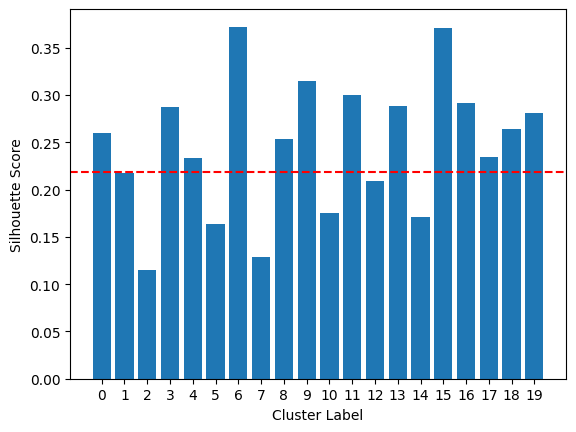

In [8]:
kmeans_labels=clustering.KMeans_clustering(main_map, metagene_map, 20) #performs KMeans algorithm, plotting it and each clusters silhouette score.

In [9]:
kmeans_clustered_symbols=clustering.clustered_symbols_dict(kmeans_labels, 40, genesymbol_grid) #dictionary with every gene symbol within each cluster
kmeans_clustered_ids=clustering.clustered_ids_dict(kmeans_labels, 40, geneid_grid) #dictionary with every gene ensembl id within each cluster

Silhouette Score: 0.22715939046916447
Davies-Bouldin: 1.109193267255383
Calinski-Harabasz: 348.26142429424766


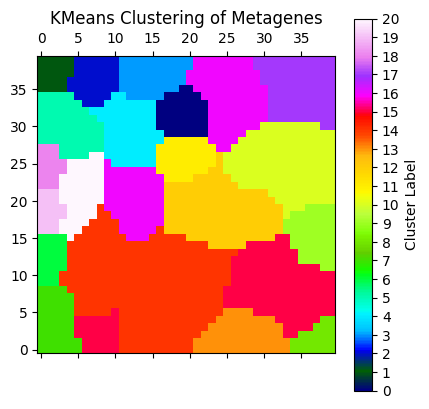

Average Silhouette Score within Cluster: {0: 0.2657672911741118, 1: 0.38536135558045004, 2: 0.3367361794738667, 3: 0.26894093640889494, 4: 0.28920768678126246, 5: 0.1058405449474575, 6: 0.34022540695870135, 7: 0.29720256848211607, 8: 0.4083684763442383, 9: 0.3183353134029939, 10: 0.1788113999742328, 11: 0.34877034349376057, 12: 0.07849613280457686, 13: 0.2887678171588632, 14: 0.253504642919592, 15: 0.1370083857184645, 16: 0.2120642332042829, 17: 0.15841196390619236, 18: 0.367323842328669, 19: 0.3578236505385465, 20: 0.314080309273273}
Total Average: 0.22715939046916447


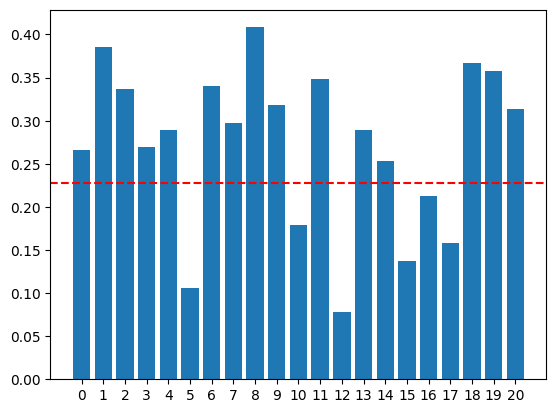

In [61]:
evidence_acc=clustering.evidence_accumulation(metagene_map, 0, 200, 'average') #performs evidence accumulation kmeans

In [260]:
ea_clustered_symbols=clustering.clustered_symbols_dict(evidence_acc, 40, genesymbol_grid) #dictionary with every gene symbol within each cluster
ea_clustered_ids=clustering.clustered_ids_dict(evidence_acc, 40, geneid_grid) #dictionary with every gene ensembl id within each cluster

In [179]:
clustering.Desenho(main_map.weights[:,:,18], 40, filename='frank_day14') #calls draw app with SOM portrait as background

Mask saved as 'frank_day14.npy'
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [160]:
clustering.Desenho(kmeans_labels, 40, filename='normalkmeans') #calls draw app with kmeans as background

In [46]:
clustering.Desenho(evidence_acc, 40, filename='evidenceaccumulation') #calls draw app with evidence accumulation as background

In [8]:
mycluster_symbols, mycluster_ids=clustering.mycluster(input_file='simao35_gsea.npy', main_map=main_map, genesymbol_grid=genesymbol_grid, geneid_grid=geneid_grid)

## gogsea module

Setting up Gene Ontology is a bit tricky the first time.
Below are a couple of steps to ensure a relatively easy first time setting everything up and installing.

1.  Install goatools package using !pip install goatools

2.  Go to https://www.ncbi.nlm.nih.gov/gene, "9606"[Taxonomy ID] AND alive[property] AND genetype protein coding[Properties] -> send to file

3. Locate file ncbi_gene_results_to_python.py. It should be in one of the files of goatools, where you installed it.

4. run !python your/path/to/ncbi_gene_results_to_python.py -o genes_ncbi_human.py gene_result.txt (KEEP THE NAMES OF THE FILES AS THEY ARE!)

5. The first time running gene ontology may take a while.

In [7]:
!python .venv/Lib/site-packages/goatools/cli/ncbi_gene_results_to_python.py genes_ncbi_human.py gene_result.txt

  EXISTS: go-basic.obo
  EXISTS: gene2go
go-basic.obo: fmt(1.2) rel(2024-06-17) 45,494 Terms
HMS:0:01:10.154452 347,845 annotations, 20,780 genes, 18,718 GOs, 1 taxids READ: gene2go 

Load BP Ontology Enrichment Analysis ...
 83% 17,029 of 20,608 population items found in association

Load CC Ontology Enrichment Analysis ...
 88% 18,165 of 20,608 population items found in association

Load MF Ontology Enrichment Analysis ...
 86% 17,620 of 20,608 population items found in association
input genes: 725
mapped genes: 394

Runing BP Ontology Analysis: current study set of 394 IDs.
 92%    361 of    394 study items found in association
100%    394 of    394 study items found in population(20608)
Calculating 12,143 uncorrected p-values using fisher_scipy_stats
  12,143 terms are associated with 17,029 of 20,608 population items
   1,966 terms are associated with    361 of    394 study items
  METHOD fdr_bh:
      17 GO terms found significant (< 0.05=alpha) ( 17 enriched +   0 purified): sta

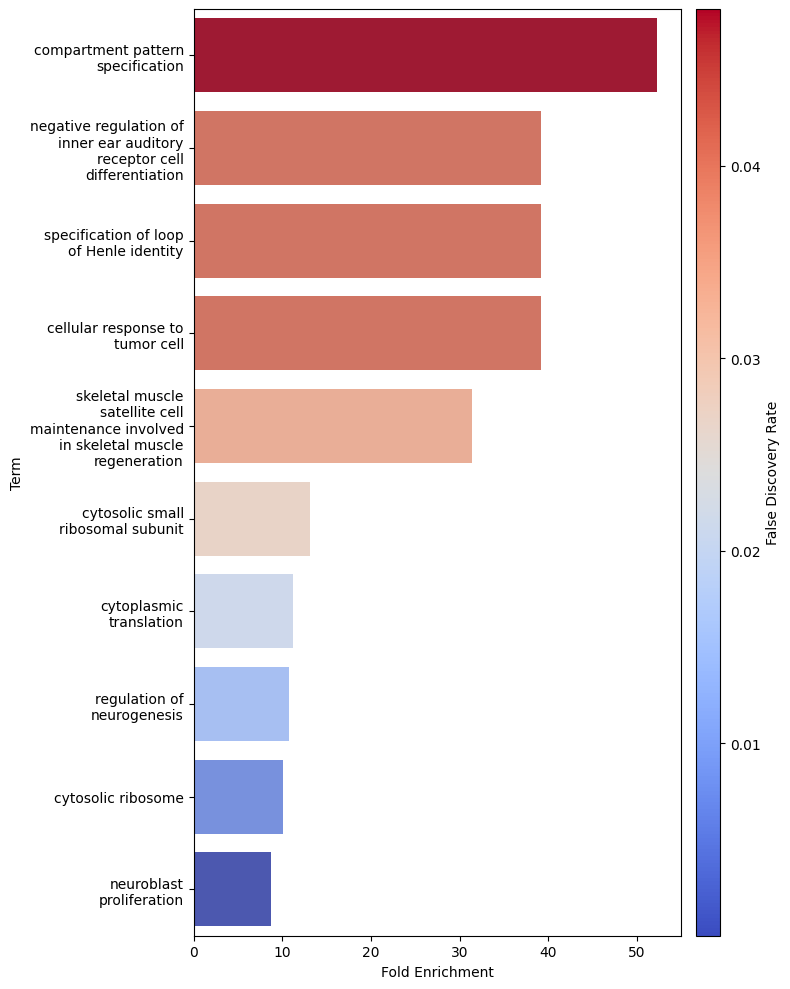

In [35]:
df=gogsea.cluster_go(clustered_genes=kmeans_clustered_symbols, cluster_number=12) #performs gene ontology, on the selected cluster from the selected dictionary.
gogsea.gontology(df) #plots results

In [ ]:
gogsea.cluster_to_go(kmeans_clustered_symbols, 8, 'what') #saves gene symbols to file and prints it, if you intend to perform gene ontology somewhere else

In [ ]:
#ranks genes within a cluster by their maximum expression values
#Attention: if ensembl_id=True, use genes_ids, else use gene_symbols.
df_sorted=gogsea.gsea_ranking(mycluster_ids, classification.classification_map, Ensembl, ensembl_id)
df_sorted

Gene-set library from Enrichr (https://maayanlab.cloud/Enrichr/#libraries)

                                      Term       fdr        es       nes
0                 ECM-receptor interaction  0.033546  0.499348  1.906138
1                       Pathways in cancer  0.106230  0.332766  1.493468
2                           Focal adhesion  0.111821  0.424006  1.591547
3               PI3K-Akt signaling pathway  0.128594  0.312380  1.419421
4           Human papillomavirus infection  0.134185  0.383865  1.506800
5  Transcriptional misregulation in cancer  0.138658  0.382477  1.441735
6            Pathways of neurodegeneration  0.159744  0.346792  1.309783


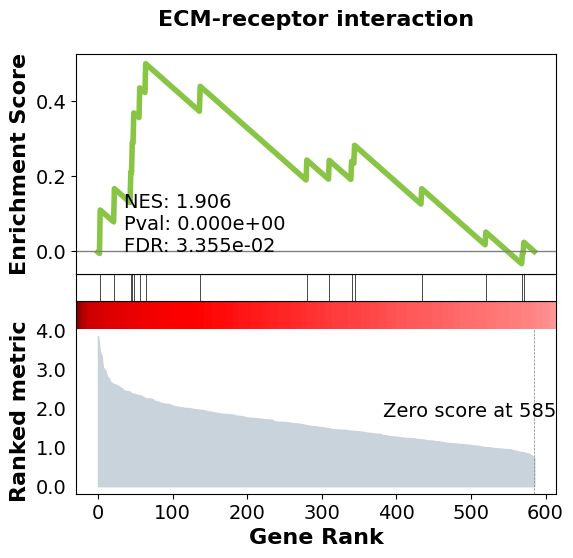

In [10]:
#performs geneset enrichment analysis, with the rank previously given and the geneset provided from Enrichr
out_df=gogsea.enrichment(df_sorted, 'KEGG_2021_Human', 15, 700)

From https://www.gsea-msigdb.org/gsea/msigdb/human/collections.jsp#C2

In [2]:
geneset_h=gogsea.geneset_into_dict('Gene Sets/h.all.v2024.1.Hs.json')
geneset_c2=gogsea.geneset_into_dict('Gene Sets/c2.all.v2024.1.Hs.json')
geneset_c3=gogsea.geneset_into_dict('Gene Sets/c3.all.v2024.1.Hs.json')
geneset_c5=gogsea.geneset_into_dict('Gene Sets/c5.all.v2024.1.Hs.json')
geneset_c8=gogsea.geneset_into_dict('Gene Sets/c8.all.v2024.1.Hs.json') #converts json file into the correct format.

2024-10-12 18:51:16,688 [WARNING] Duplicated values found in preranked stats: 0.15% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


                                                  Term  false discovery rate  \
0                DESCARTES_FETAL_ADRENAL_STROMAL_CELLS                   0.0   
1                  DESCARTES_FETAL_CEREBRUM_ASTROCYTES                   0.0   
2                    DESCARTES_FETAL_EYE_STROMAL_CELLS                   0.0   
3                 DESCARTES_FETAL_KIDNEY_STROMAL_CELLS                   0.0   
4    CUI_DEVELOPING_HEART_COMPACT_VENTRICULAR_CARDI...                   0.0   
..                                                 ...                   ...   
694  GAUTAM_EYE_IRIS_CILIARY_BODY_CILIARY_BODY_ENDO...                   1.0   
695  FAN_OVARY_CL10_PUTATIVE_EARLY_ATRESIA_GRANULOS...                   1.0   
696      DESCARTES_MAIN_FETAL_CLC_IL5RA_POSITIVE_CELLS                   1.0   
697                GAUTAM_EYE_CORNEA_CYTOTOXIC_T_CELLS                   1.0   
698   DESCARTES_MAIN_FETAL_SLC26A4_PAEP_POSITIVE_CELLS                   1.0   

     enrichment score  normalized es  


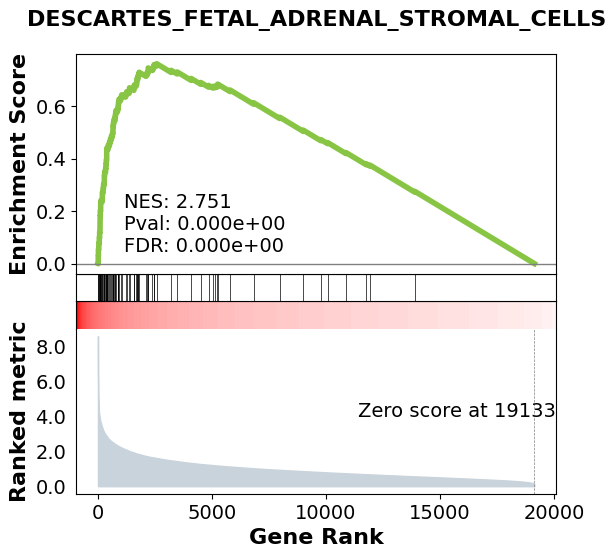

In [21]:
out_df=gogsea.enrichment(df_sorted, geneset_c8, 15, 500) #geneset enrichment analysis conducted on the newly built geneset